In [16]:
import os.path as osp
import numpy as np
%matplotlib inline
from nuscenes.nuscenes import NuScenes

nusc = NuScenes(version='v1.0-mini', dataroot='D:\Documents\dataset', verbose=True)

Loading NuScenes tables for version v1.0-mini...
23 category,
8 attribute,
4 visibility,
911 instance,
12 sensor,
120 calibrated_sensor,
31206 ego_pose,
8 log,
10 scene,
404 sample,
31206 sample_data,
18538 sample_annotation,
4 map,
Done loading in 0.606 seconds.
Reverse indexing ...
Done reverse indexing in 0.1 seconds.


In [2]:
my_scene = nusc.scene[0]
first_sample_token = my_scene['first_sample_token']
my_sample = nusc.get('sample', first_sample_token)

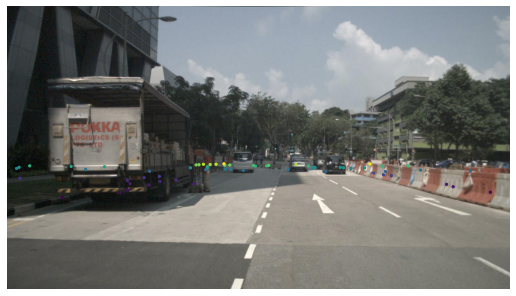

In [3]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='RADAR_FRONT')

In [4]:
radar_sensor = 'RADAR_FRONT'
camera_sensor = 'CAM_FRONT'
lidar_sensor = 'LIDAR_TOP'
radar_front_data = nusc.get('sample_data', my_sample['data'][radar_sensor])
camera_sensor_data = nusc.get('sample_data', my_sample['data'][camera_sensor])
lidar_sensor_data = nusc.get('sample_data', my_sample['data'][lidar_sensor])

In [5]:
# First step: transform the pointcloud to the ego vehicle frame for the timestamp of the sweep.

cs_record = nusc.get('calibrated_sensor', radar_front_data['calibrated_sensor_token'])
rotation = cs_record['rotation']
translation = cs_record['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [0.9999984769132877, 0.0, 0.0, 0.0017453283658983088]
translation [3.412, 0.0, 0.5]


In [6]:
# Second step: transform from ego to the global frame.

poserecord = nusc.get('ego_pose', radar_front_data['ego_pose_token'])
rotation = poserecord['rotation']
translation = poserecord['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [0.5721129977125774, -0.0014962022442161157, 0.011922678049447764, -0.8200867813684729]
translation [411.25243634487725, 1180.7511754315697, 0.0]


In [21]:
# Third step: transform from global into the ego vehicle frame for the timestamp of the image.

poserecord = nusc.get('ego_pose', camera_sensor_data['ego_pose_token'])
rotation = poserecord['rotation']
rotation = np.transpose(rotation)
translation = poserecord['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [ 0.57200635 -0.00214348  0.01156409 -0.82016487]
translation [411.4199861830012, 1181.197175631848, 0.0]


In [22]:
 # Fourth step: transform from ego into the camera.
    
cs_record = nusc.get('calibrated_sensor', camera_sensor_data['calibrated_sensor_token'])
rotation = cs_record['rotation']
rotation = np.transpose(rotation)
translation = cs_record['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [ 0.49980154 -0.50303162  0.49977981 -0.49737084]
translation [1.70079118954, 0.0159456324149, 1.51095763913]


In [59]:
## 5 (2) 

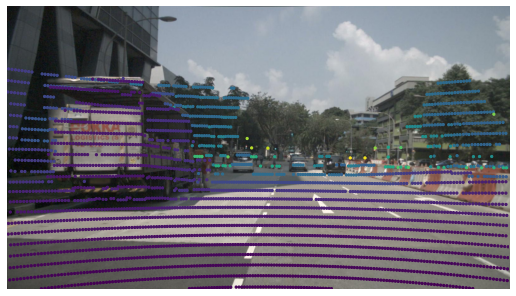

In [9]:
nusc.render_pointcloud_in_image(my_sample['token'], pointsensor_channel='LIDAR_TOP')

In [10]:
# First step: transform the pointcloud to the ego vehicle frame for the timestamp of the sweep.

cs_record = nusc.get('calibrated_sensor', lidar_sensor_data['calibrated_sensor_token'])
rotation = cs_record['rotation']
translation = cs_record['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [0.7077955119163518, -0.006492242056004365, 0.010646214713995808, -0.7063073142877817]
translation [0.943713, 0.0, 1.84023]


In [18]:
# Second step: transform from ego to the global frame.

poserecord = nusc.get('ego_pose', lidar_sensor_data['ego_pose_token'])
rotation = poserecord['rotation']
translation = poserecord['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [0.5720320396729045, -0.0016977771610471074, 0.011798001930183783, -0.8201446642457809]
translation [411.3039349319818, 1180.8903791765097, 0.0]


In [19]:
# Third step: transform from global into the ego vehicle frame for the timestamp of the image.

poserecord = nusc.get('ego_pose', camera_sensor_data['ego_pose_token'])
rotation = poserecord['rotation']
rotation = np.transpose(rotation)
translation = poserecord['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [ 0.57200635 -0.00214348  0.01156409 -0.82016487]
translation [411.4199861830012, 1181.197175631848, 0.0]


In [20]:
 # Fourth step: transform from ego into the camera.
    
cs_record = nusc.get('calibrated_sensor', camera_sensor_data['calibrated_sensor_token'])
rotation = cs_record['rotation']
rotation = np.transpose(rotation)
translation = cs_record['translation']
print('rotatation',rotation)
print('translation',translation)

rotatation [ 0.49980154 -0.50303162  0.49977981 -0.49737084]
translation [1.70079118954, 0.0159456324149, 1.51095763913]
